# Tečnový polygon

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
%matplotlib nbagg

## Konzola

In [3]:
Image(url="konzola.png", width=300, embed=False)

In [4]:
F = 4
q = 4
l = 4
x = np.linspace(0, 4, 100)
def M(x):
    return -F * x - q * x**2 / 2
Mq = 1 / 8 * q * l**2 # moment od samotného spojitého zatížení

<IPython.core.display.Javascript object>


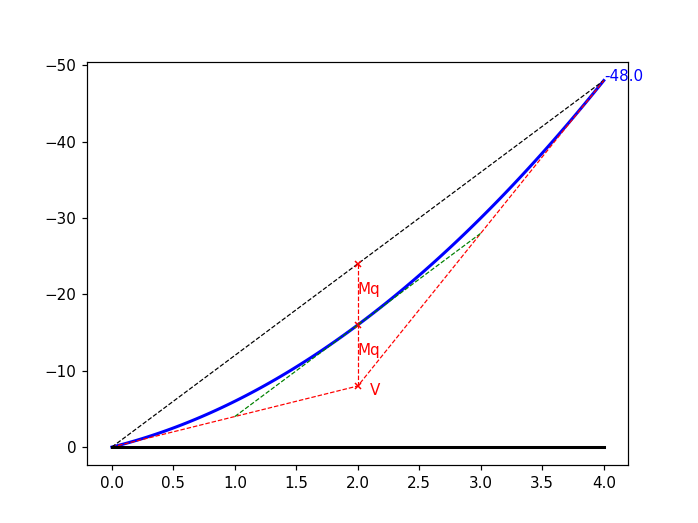

In [5]:
fig, ax = plt.subplots()
ax.plot(x, M(x), 'b-', lw=2)
ax.plot([0, 4], [0, M(4)], 'k--', lw=.8)
ax.text(4, M(4), '%.1f' % M(4), color='b')

ax.plot(l / 2, M(4) / 2, 'rx', ms=4)
ax.plot(l / 2, M(4) / 2 + Mq, 'rx', ms=4)
ax.plot(l / 2, M(4) / 2 + 2*Mq, 'rx', ms=4)
V = M(4) / 2 + 2 * Mq
ax.plot([0, l / 2, 4], [0, V, M(4)], 'r--', lw=.8)
ax.text(l / 2 * 1.05, V * 1.05, 'V', color='r', va='top')

ax.plot([l / 2, l / 2], [V, M(4) / 2 + Mq], 'r--', lw=.8)
ax.text(l / 2, (V + M(4) / 2 + Mq) / 2, 'Mq', color='r')
ax.plot([l / 2, l / 2], [M(4) / 2, M(4) / 2 + Mq], 'r--', lw=.8)
ax.text(l / 2, (M(4) / 2 + M(4) / 2 + Mq) / 2, 'Mq', color='r')

ax.plot([l / 4, 3 * l / 4], [V / 2, (M(4) + V) / 2], 'g--', lw=.8)


ax.plot([0, 4], [0, 0], 'k-', lw=2)
ax.invert_yaxis()

## Prostý nosník

In [6]:
Image(url="prosty_nosnik.png", width=300, embed=False)

In [7]:
M1 = 3.
q = 1.
l = 4.
Ra = - (M1 - q * l**2 / 2) / l
Rb = - Ra + q * l
x = np.linspace(0, 4, 100)
def M(x):
    return M1 + Ra * x - q * x**2 / 2
Mq = 1 / 8 * q * l**2 # moment od samotného spojitého zatížení

<IPython.core.display.Javascript object>


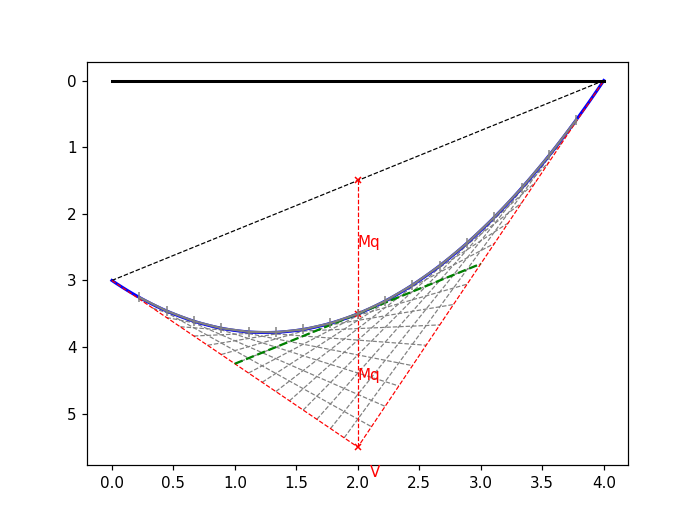

In [8]:
fig, ax = plt.subplots()
ax.plot(x, M(x), 'b-', lw=2)
ax.plot([0, 4], [M1, M(4)], 'k--', lw=.8)
#ax.text(4, M(4), '%.1f' % M(4), color='b')

ax.plot(l / 2, M1 / 2, 'rx', ms=4)
ax.plot(l / 2, M1 / 2 + Mq, 'rx', ms=4)
ax.plot(l / 2, M1 / 2 + 2*Mq, 'rx', ms=4)
V = M1 / 2 + 2 * Mq
ax.plot([0, l / 2, 4], [M1, V, 0], 'r--', lw=.8)
ax.text(l / 2 * 1.05, V * 1.05, 'V', color='r', va='top')

ax.plot([l / 2, l / 2], [V, M1 / 2 + Mq], 'r--', lw=.8)
ax.text(l / 2, (V + M1 / 2 + Mq) / 2, 'Mq', color='r')
ax.plot([l / 2, l / 2], [M1 / 2, M1 / 2 + Mq], 'r--', lw=.8)
ax.text(l / 2, (M1 / 2 + M1 / 2 + Mq) / 2, 'Mq', color='r')

ax.plot([l / 4, 3 * l / 4], [(M1 + V) / 2, V / 2], 'g--', lw=1.5)

ax.plot([0, 4], [0, 0], 'k-', lw=2)

# draw polygon
xp = np.linspace(0, l, 19)[1:-1]
def Mp(x):
    return (x/2, x + (l-x)/2), (Ra * x/2 + M1, Rb * (l - x)/2)

dist = []
for i in xp:
    xx, yy = Mp(i)
    dist.append((*xx, *yy))
    ax.plot(xx, yy, color='grey', zorder=-1, ls='--', lw=.8)
    
ax.plot(xp, M(xp), color='grey', marker='|')

ax.invert_yaxis()

In [9]:
dist = np.array(dist)
np.sum((dist[1:, [1, 3]] - dist[:-1, [1, 3]])**2, axis=1)

array([0.10570988, 0.10570988, 0.10570988, 0.10570988, 0.10570988,
       0.10570988, 0.10570988, 0.10570988, 0.10570988, 0.10570988,
       0.10570988, 0.10570988, 0.10570988, 0.10570988, 0.10570988,
       0.10570988])

## Prostý nosník - tojúhelníkové zatížení

In [10]:
Image(url="prosty_nosnik_troj.png", width=300, embed=False)

In [11]:
M1 = .5
q = .5
l = 4.
Ra = - (M1 - q * l/2 * 1/3*l) / l
Rb = - Ra + q * l / 2
x = np.linspace(0, 4, 100)

def V(x):
    return Ra - q * x / 2
def M(x):
    qx = x * q / l
    return M1 + Ra * x - 1/2 * qx * x**2 / 3
#Mq = 1 / 8 * q * l**2 # moment od samotného spojitého zatížení
def trapezoid_centroid(l, a, b):
    return 1/3 * l * (b+2*a)/(a+b)

<IPython.core.display.Javascript object>


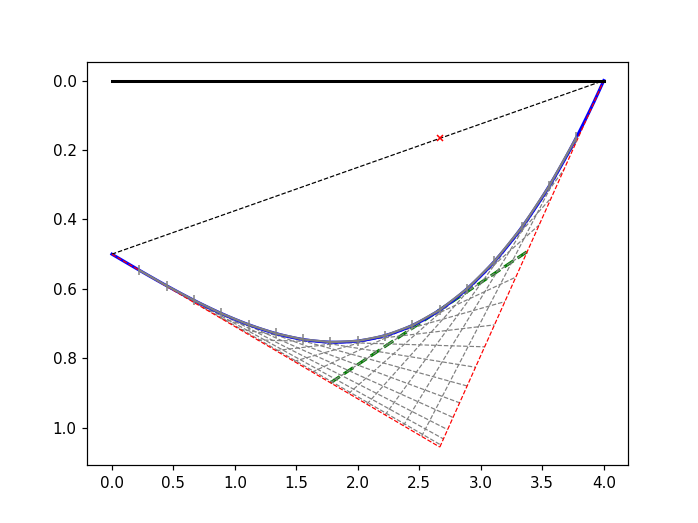

In [12]:
def Mp(x):
    qx = x * q / l
    x1 = x - trapezoid_centroid(x, 0, qx)
    x2 = trapezoid_centroid(l-x, qx, q)
    return (x1, l-x2), (Ra*x1+M1, x2*Rb)

fig, ax = plt.subplots()
ax.plot(x, M(x), 'b-', lw=2)
ax.plot([0, 4], [M1, M(4)], 'k--', lw=.8)

ax.plot(2*l / 3, M1 / 3, 'rx', ms=4)
ax.plot([0, 2*l/3], [M1, Ra*l*2/3+M1], 'r--', lw=.8)
ax.plot([2*l/3, l], [Rb*l*1/3, 0], 'r--', lw=.8)

xx, yy = Mp(2/3*l)
ax.plot(xx, yy, color='g', zorder=-1, ls='--', lw=2)

ax.plot([0, 4], [0, 0], 'k-', lw=2)

# draw polygon
xp = np.linspace(0, l, 19)[1:-1]
dist = []
for i in xp:
    xx, yy = Mp(i)
    dist.append([*xx, *yy])
    ax.plot(xx, yy, color='grey', zorder=-1, ls='--', lw=.8)
    
ax.plot(xp, M(xp), color='grey', marker='|')

ax.invert_yaxis()

<IPython.core.display.Javascript object>


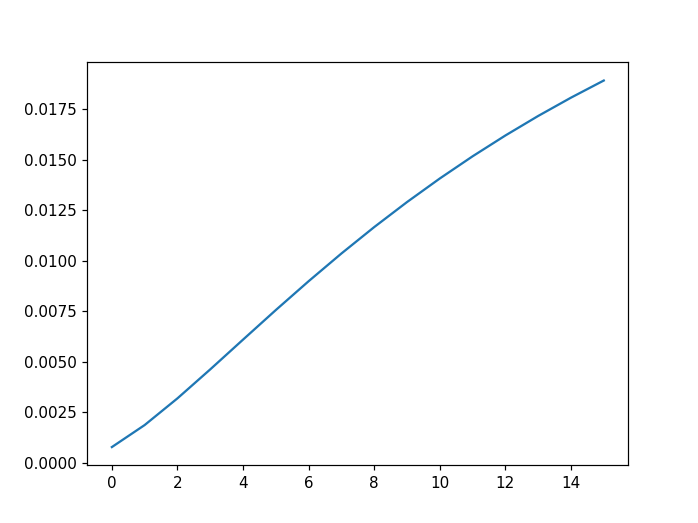

array([0.0046288 , 0.01113533, 0.01901663, 0.02757408, 0.03636226,
       0.04509983, 0.05361271, 0.06179718, 0.06959582, 0.07698159,
       0.08394717, 0.09049793, 0.09664711, 0.10241265, 0.10781504,
       0.11287588])

In [13]:
dist = np.array(dist)
dist = np.sum((dist[1:, [1, 3]] - dist[:-1, [1, 3]])**2, axis=1)

fig, ax = plt.subplots()
ax.plot(dist)

dist / np.sum(dist)

In [14]:
dist[1:]/dist[:-1]

array([2.40566431, 1.70777376, 1.44999839, 1.31871151, 1.24029252,
       1.18875628, 1.15265911, 1.12619742, 1.10612366, 1.09048374,
       1.07803428, 1.0679483 , 1.05965562, 1.0527512 , 1.04694   ])